### Add Sales data 2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [3]:
data.rename(columns={'Add1(in Thousands)':'Add1','Add2(in Thousands)':'Add2','Add3(in Thousands)':'Add3','Add4(in Thousands)':'Add4','Add5(in Thousands)':'Add5','Profit(in Thousands)':'Profit',},inplace=True)
data.head()

,Date,Add1,Add2,Add3,Add4,Add5,Profit
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    205 non-null    object 
 1   Add1    205 non-null    float64
 2   Add2    205 non-null    float64
 3   Add3    205 non-null    float64
 4   Add4    205 non-null    float64
 5   Add5    205 non-null    float64
 6   Profit  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
data.isnull().sum()

Date      0
Add1      0
Add2      0
Add3      0
Add4      0
Add5      0
Profit    0
dtype: int64

### Whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

Text(0.5, 1.0, 'Relation between advertisement through company 5 and profit generated')

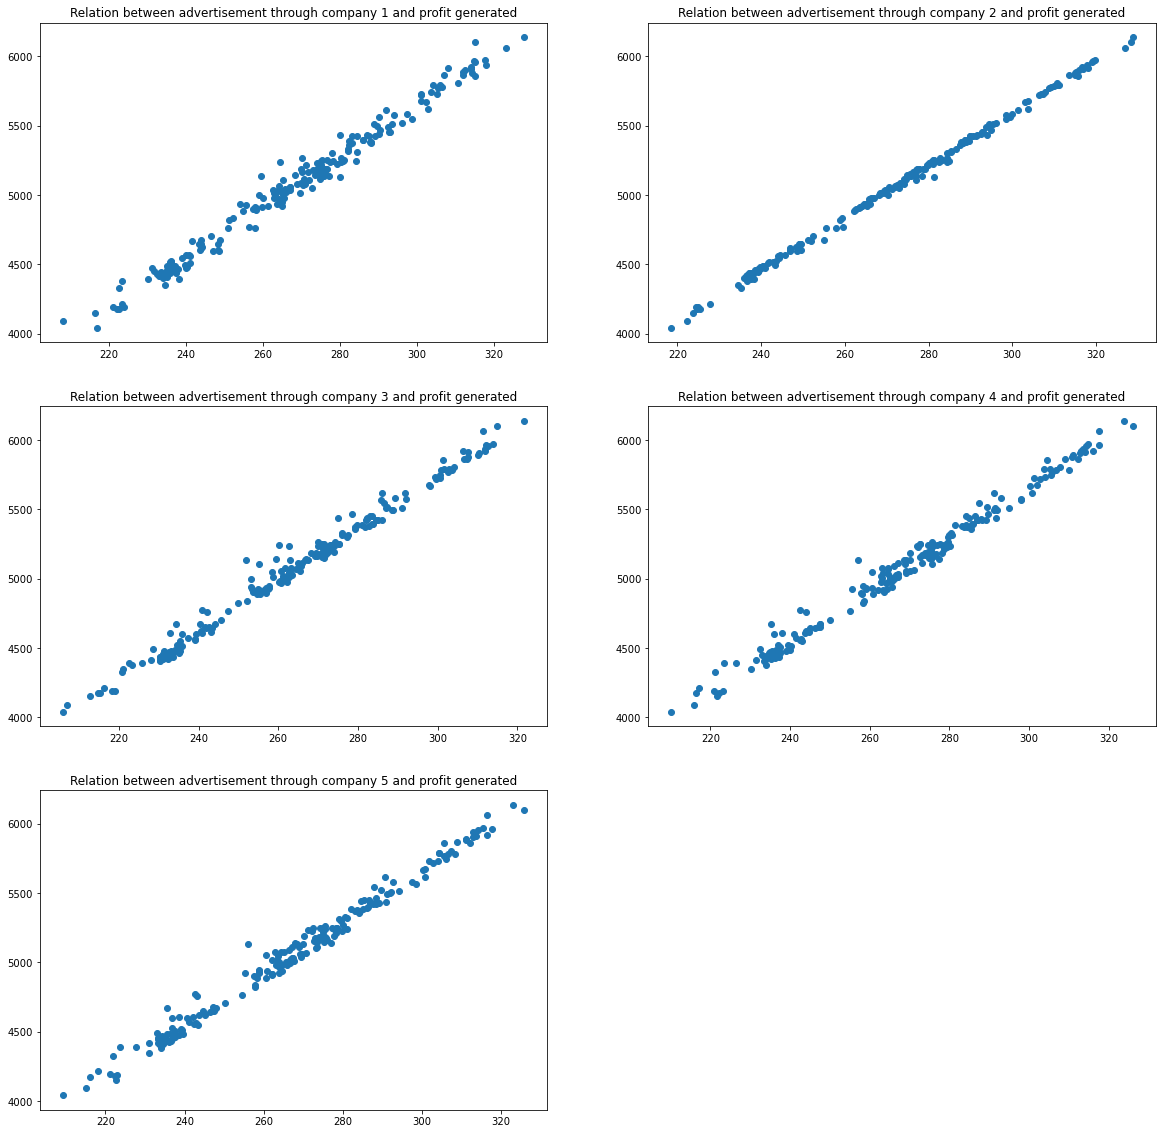

In [6]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.scatter(x='Add1',y='Profit',data=data)
plt.title('Relation between advertisement through company 1 and profit generated')

plt.subplot(3,2,2)
plt.scatter(x='Add2',y='Profit',data=data)
plt.title('Relation between advertisement through company 2 and profit generated')

plt.subplot(3,2,3)
plt.scatter(x='Add3',y='Profit',data=data)
plt.title('Relation between advertisement through company 3 and profit generated')

plt.subplot(3,2,4)
plt.scatter(x='Add4',y='Profit',data=data)
plt.title('Relation between advertisement through company 4 and profit generated')

plt.subplot(3,2,5)
plt.scatter(x='Add5',y='Profit',data=data)
plt.title('Relation between advertisement through company 5 and profit generated')

<AxesSubplot:>

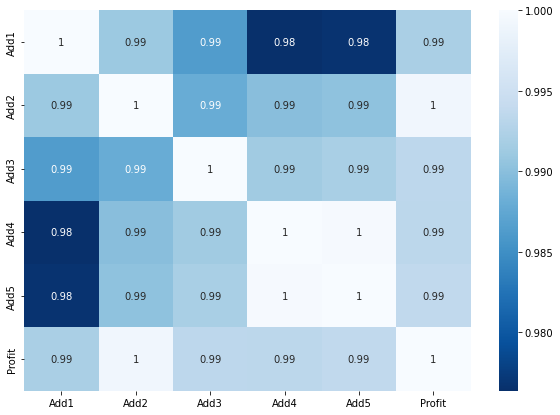

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='Blues_r')

##### There is a very strong linear relationship between amount spent on advertisement through the five different companies and the profit generated.

### Build a regression model to predict the profit from the given data.

In [8]:
x=data[[ 'Add1', 'Add2', 'Add3', 'Add4', 'Add5']]      # Independent features
y=data['Profit']                                       # Target feature

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
# Splitting given data into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [11]:
# Creating instance of the model
l_model=LinearRegression()

In [12]:
# Fitting training data to the model and predicting profit using test data
l_model.fit(x_train,y_train)
y_pred=l_model.predict(x_test)

##### Evaluating the model

In [13]:
r2_score(y_test,y_pred)

1.0

In [14]:
mean_squared_error(y_test,y_pred)

4.64028148505357e-25

##### The model has an r-squared value of 1 which shows the model is fit well.

### Predicting the profit generated by the company if they wish to spend the following amount for advertisement.
1. Add1 - 290
2. Add2 - 312
3. Add3 - 309
4. Add4 - 298
5. Add5 - 320

In [15]:
new_data=np.array([[290,312,309,298,320]])
l_model.predict(new_data)

C:\Users\sofia\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5820.06])

##### Profit of the company if they wish to spend theabove mentioned amounts on different advertisement companies would be 5820.06 (in thousands).